# Graph EDA

#### helper functions:
graph_users(user_lst, bitcoin_df)

In [1]:
import pandas as pd
import numpy as np
import datetime
import networkx as nx
import nxpd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import sys
sys.path.insert(0, '../src')
import helpers as h
import visualizations as v

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

In [2]:
# Load and preprocess data
otc_df = h.load_bitcoin_edge_data('../data/soc-sign-bitcoinotc.csv.gz')
alpha_df = h.load_bitcoin_edge_data('../data/soc-sign-bitcoinalpha.csv.gz')
alpha_users = h.user_activity_dataframe(alpha_df)
otc_users = h.user_activity_dataframe(otc_df)

In [3]:
# Load graph objects
_ , alpha_G = h.build_graph(alpha_df)
_ , alpha_pos_G = h.build_graph(alpha_df, rating_type='pos')
_ , otc_G = h.build_graph(otc_df)
_ , otc_pos_G = h.build_graph(otc_df, rating_type='pos')

In [4]:
print(nx.clustering(alpha_G, 7536))
print(nx.clustering(alpha_pos_G, 7536))
print()
print(nx.clustering(alpha_G, 5533))
print(nx.clustering(alpha_pos_G, 5533))
print()
print(nx.clustering(alpha_G, 7517))
print(nx.clustering(alpha_pos_G, 7517))
print()
print(nx.clustering(alpha_G, 7513))
print(nx.clustering(alpha_pos_G, 7513))

0.5732758620689655
0.5384615384615384

0.5174418604651163
0.4444444444444444

0.5151515151515151
0.38095238095238093

0.2623762376237624
0.11320754716981132


In [ ]:
v.plot_timeline(alpha_df, 'Alpha Bit Coin Ratings Activity')

In [ ]:
# Graph Statistics:
print(f"Node Count: {alpha_G.number_of_nodes()}")
print(f"Edge Count: {alpha_G.number_of_edges()}")

In [ ]:
# Graph Statistics:
print(f"Node Count: {alpha_pos_G.number_of_nodes()}")
print(f"Edge Count: {alpha_pos_G.number_of_edges()}")

# 100 nodes that are just negative? Verify??

In [36]:
alpha_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3783 entries, 1 to 7604
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   RatingsReceived          3783 non-null   float64        
 1   AvgRatingReceived        3783 non-null   float64        
 2   MedianRatingReceived     3783 non-null   float64        
 3   MinRatingReceived        3783 non-null   float64        
 4   MaxRatingReceived        3783 non-null   float64        
 5   DateFirstRatingReceived  3754 non-null   datetime64[ns] 
 6   DateLastRatingReceived   3754 non-null   datetime64[ns] 
 7   NegReceivedCnt           3783 non-null   float64        
 8   PosReceivedCnt           3783 non-null   float64        
 9   RatingsGiven             3783 non-null   float64        
 10  AvgRatingGiven           3783 non-null   float64        
 11  MedianRatingGiven        3783 non-null   float64        
 12  MinRatingGiven      

### color code the node below (0, 1, 2) negative ratings)

/Users/allanalberts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/allanalberts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/allanalberts/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


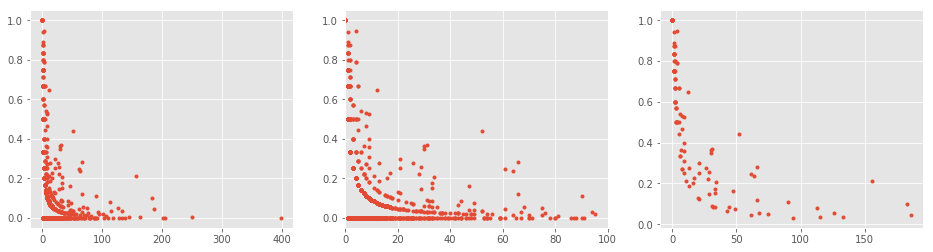

In [52]:
# how many negative ratings are just a part of doing business on the network?
alpha_users['NegReceivedPct'] = alpha_users['NegReceivedCnt'] / (alpha_users['NegReceivedCnt'] + alpha_users['PosReceivedCnt'])

fig, axs = plt.subplots(1,3, figsize=(16,4))
x = alpha_users['PosReceivedCnt']
y = alpha_users['NegReceivedPct']
axs[0].plot(x, y, '.')

# x = alpha_users[alpha_users['NegReceivedCnt']>0]['PosReceivedCnt']
# y = alpha_users[alpha_users['NegReceivedCnt']>0]['NegReceivedPct']
axs[1].set_xlim(0,100)
axs[1].plot(x, y, '.')

x = alpha_users[alpha_users['NegReceivedCnt']>2]['PosReceivedCnt']
y = alpha_users[alpha_users['NegReceivedCnt']>2]['NegReceivedPct']
axs[2].plot(x, y, '.')

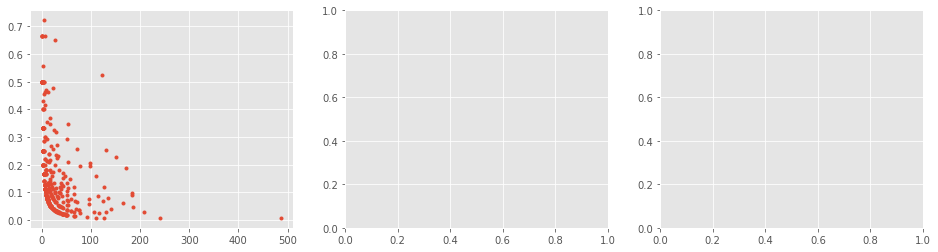

In [55]:
#  who is giving the negative ratings
# There are 4 individuals who have 100+ pos ratings given but > 20% of ratings are also negative. These
# are not likely victims as they would be discouraged by now. More likely vigilantees tracking down
# fraudsters (based on network associations?) and giving them negative ratings.

# Interesting to see how may negatives they received back
alpha_users['NegGivenPct'] = alpha_users['NegGivenCnt'] / (alpha_users['NegGivenCnt'] + alpha_users['PosGivenCnt'])

fig, axs = plt.subplots(1,3, figsize=(16,4))
x = alpha_users['PosGivenCnt']
y = alpha_users['NegGivenPct']
axs[0].plot(x, y, '.')

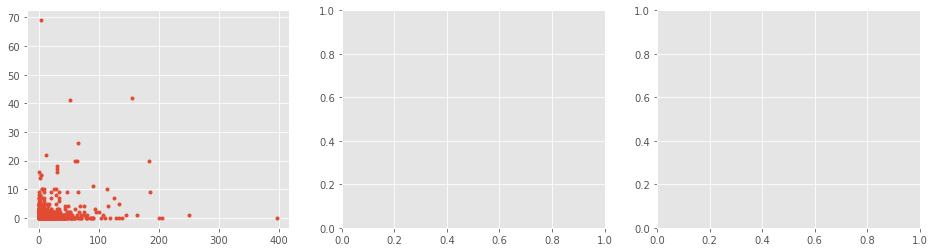

In [56]:
# fraud received vs. pos received
fig, axs = plt.subplots(1,3, figsize=(16,4))
x = alpha_users['PosReceivedCnt']
y = alpha_users['NegReceivedCnt']
axs[0].plot(x, y, '.')

In [58]:
alpha_users[alpha_users['NegReceivedCnt']> 40]

,RatingsReceived,AvgRatingReceived,MedianRatingReceived,MinRatingReceived,MaxRatingReceived,DateFirstRatingReceived,DateLastRatingReceived,NegReceivedCnt,PosReceivedCnt,RatingsGiven,AvgRatingGiven,MedianRatingGiven,MinRatingGiven,MaxRatingGiven,DateFirstRatingGiven,DateLastRatingGiven,NegGivenCnt,PosGivenCnt,min_ratings_delta,FirstActivity,LastActivity,TimeActive,Victim,Fraudster,RatingsGivenRatio,BotActivity,NegReceivedPct,NegGivenPct
177,198.0,0.217172,1.0,-10.0,10.0,2012-05-02 21:00:00,2014-08-25 21:00:00,42.0,156.0,202.0,1.450495,1.0,-10.0,10.0,2012-05-02 21:00:00,2014-08-25 21:00:00,18.0,184.0,0.0,2012-05-02 21:00:00,2014-08-25 21:00:00,845 days,True,True,1.020202,True,0.212121,0.089109
7603,93.0,-2.290323,1.0,-10.0,10.0,2011-07-31 21:00:00,2014-09-28 21:00:00,41.0,52.0,66.0,2.818182,1.0,-10.0,10.0,2011-07-31 21:00:00,2014-09-28 21:00:00,1.0,65.0,0.0,2011-07-31 21:00:00,2014-09-28 21:00:00,1155 days,True,True,0.709677,True,0.440860,0.015152
7604,73.0,-8.602740,-10.0,-10.0,10.0,2013-03-23 21:00:00,2014-08-25 21:00:00,69.0,4.0,21.0,5.238095,10.0,-10.0,10.0,2013-03-23 21:00:00,2014-08-25 21:00:00,5.0,16.0,0.0,2013-03-23 21:00:00,2014-08-25 21:00:00,520 days,True,True,0.287671,True,0.945205,0.238095


In [13]:
pd.crosstab(alpha_users['PosReceivedCnt'], alpha_users['NegReceivedCnt'], margins=True, margins_name="Total")

NegReceivedCnt,0.0,1.0,2.0,3.0,4.0,Total
PosReceivedCnt,,,,,,
0.0,29,77,27,12,6,151
1.0,1388,39,13,13,12,1465
2.0,597,31,9,5,11,653
3.0,321,13,6,3,3,346
4.0,184,17,4,0,6,211
5.0,127,12,4,0,4,147
6.0,93,13,2,2,1,111
7.0,414,192,39,13,41,699
Total,3153,394,104,48,84,3783


In [45]:
alpha_users[(alpha_users['NegReceivedCnt']==4) & (alpha_users['PosReceivedCnt']==3)]

,RatingsReceived,AvgRatingReceived,MedianRatingReceived,MinRatingReceived,MaxRatingReceived,DateFirstRatingReceived,DateLastRatingReceived,NegReceivedCnt,PosReceivedCnt,RatingsGiven,AvgRatingGiven,MedianRatingGiven,MinRatingGiven,MaxRatingGiven,DateFirstRatingGiven,DateLastRatingGiven,NegGivenCnt,PosGivenCnt,min_ratings_delta,FirstActivity,LastActivity,TimeActive,Victim,Fraudster,RatingsGivenRatio,BotActivity
1292,7.0,0.714286,-1.0,-1.0,7.0,2011-12-14 21:00:00,2012-01-02 21:00:00,4.0,3.0,3.0,-0.666667,1.0,-10.0,7.0,2011-12-14 21:00:00,2012-01-02 21:00:00,1.0,2.0,172800.0,2011-12-14 21:00:00,2012-01-02 21:00:00,19 days,True,True,0.428571,False
7513,7.0,-2.142857,-1.0,-10.0,8.0,2012-09-12 21:00:00,2012-09-17 21:00:00,4.0,3.0,8.0,3.625000,3.0,1.0,9.0,2012-09-12 21:00:00,2012-09-17 21:00:00,NaN,8.0,0.0,2012-09-12 21:00:00,2012-09-17 21:00:00,5 days,False,True,1.142857,True
7517,7.0,-2.285714,-10.0,-10.0,10.0,2012-09-24 21:00:00,2012-10-01 21:00:00,4.0,3.0,12.0,1.250000,7.5,-10.0,10.0,2012-09-24 21:00:00,2012-10-01 21:00:00,5.0,7.0,0.0,2012-09-24 21:00:00,2012-10-01 21:00:00,7 days,True,True,1.714286,True


In [ ]:
import seaborn as sns
sns.heatmap(table_df, annot=True)

In [ ]:
alpha_df[alpha_df['rating']<0].groupby('date')['ratee'].count().sort_values(ascending=False)

In [ ]:
alpha_df.hist('rating', bins=21)

       rater  ratee  rating                date  class  binomial_rating color  \
18179    222    373       1 2012-11-22 21:00:00      0                1  blue   
237      222      1       1 2012-11-22 21:00:00      0                1  blue   
18165    373    222       1 2012-11-24 21:00:00      0                1  blue   
18164    896    222       1 2013-11-26 21:00:00      0                1  blue   
18178    222    896       1 2013-11-26 21:00:00      0                1  blue   
438        1    222       2 2013-12-06 21:00:00      0                1  blue   
16168    222    154       1 2013-12-18 21:00:00      0                1  blue   
16183    154    222       1 2013-12-18 21:00:00      0                1  blue   
18163   2402    222       1 2013-12-23 21:00:00      0                1  blue   
18177    222   2402       1 2013-12-23 21:00:00      0                1  blue   
11820     72    222       4 2014-02-10 21:00:00      0                1  blue   
18156    351    222       2 

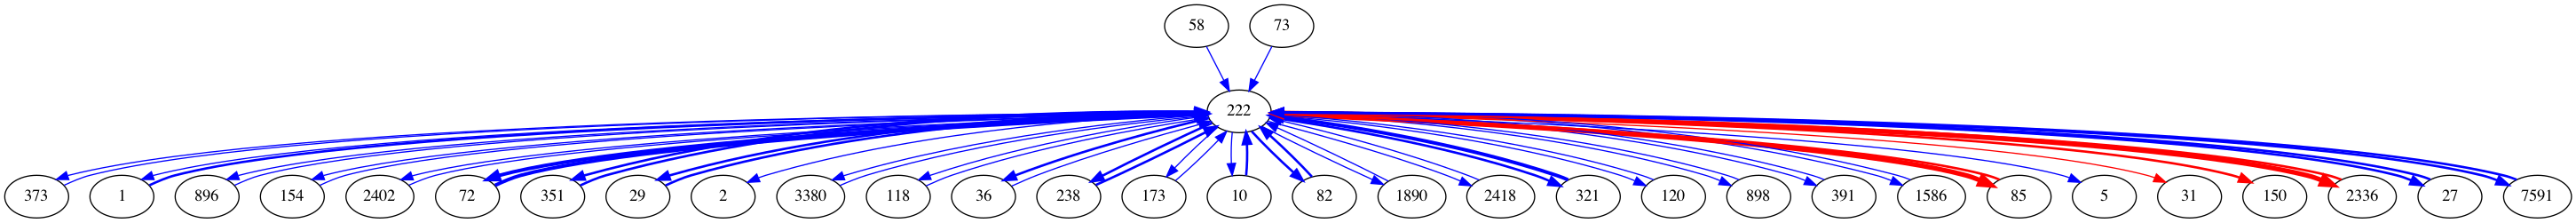

In [12]:
user_df, user_g = h.build_graph(alpha_df, user_lst=[222])#, maxdate='2014-07-19 21:00:00')
print(user_df[:])
print(alpha_users.loc[2336])
nxpd.draw(user_g, show='ipynb')


In [83]:
maxdate='2012-09-25'
alpha_df[(alpha_df['date'] <= maxdate) & (alpha_df['ratee']==7536)]

,rater,ratee,rating,date,class,binomial_rating,color,penwidth
8044,30,7536,-10,2012-09-24 21:00:00,1,-1,red,4
15841,145,7536,-10,2012-09-24 21:00:00,1,-1,red,4
24136,7517,7536,10,2012-09-24 21:00:00,0,1,blue,4
24148,7565,7536,10,2012-09-24 21:00:00,0,1,blue,4


In [ ]:
alpha_df['FirstNegRating'] = alpha_df[alpha_df['rating']<0].groupby('ratee')['date'].min()

In [ ]:
alpha_df['RatingsPriorToNeg'] = alpha_df[alpha_df['date']<alpha_df['FirstNegRating']].groupby('ratee')['rating'].count()

In [ ]:
alpha_df.groupby('RatingsPriorToNeg')['rating'].count()

In [ ]:
alpha_df[alpha_df['RatingsPriorToNeg']==44]

In [28]:
alpha_df[(alpha_df['ratee']==177) | (alpha_df['rater']==177)][20:]

,rater,ratee,rating,date,class,binomial_rating,color,penwidth
7247,25,177,-1,2013-07-18 21:00:00,1,-1,red,1
7249,177,26,9,2013-01-22 21:00:00,0,1,blue,4
7487,26,177,-10,2013-06-26 21:00:00,1,-1,red,4
7564,177,27,1,2013-03-04 21:00:00,0,1,blue,1
7624,27,177,1,2013-03-03 21:00:00,0,1,blue,1
...,...,...,...,...,...,...,...,...
17138,177,7565,-10,2012-10-01 21:00:00,1,-1,red,4
17139,177,7536,-10,2012-10-01 21:00:00,1,-1,red,4
17140,177,5533,-10,2012-10-01 21:00:00,1,-1,red,4
17141,177,7583,-10,2012-05-25 21:00:00,1,-1,red,4


In [ ]:
nxpd.draw(user_g, show='ipynb')

In [ ]:
test_g = nx.ego_graph(alpha_G, 7604, radius=1)
nx.draw_shell(test_g )

In [ ]:
nxpd.draw(test_g, show='ipynb')

In [ ]:
census = nx.triadic_census(alpha_G)
census

In [ ]:
nx.clustering(test_g, 7604)

In [ ]:
node_census = nx.triads_by_type(test_g)

In [ ]:
nx.all_triads(test_g)

In [ ]:
users = [7599]
users_df, users_g = v.graph_users(users, alpha_df)
print(users_df[['date','rater','ratee','rating']])
nxpd.draw(users_g, show='ipynb')


In [ ]:
# need to take a fraudster and measure this at different radius amounts

# might also be interesting to find fully connected triads within 1 node radius of user

print("Proportion of the nodes that you rate, that also rate each other")
# low rating means more of a broadcaster, high rating means dense network with lots of mutual trust ???
g_user = nx.ego_graph(alpha_pos_G,7599, undirected=True, radius=1)
print(f"Clustering Coefficent: {nx.average_clustering(g_user):.2f}")
print(f"Clustering Coefficent: {nx.clustering(g_user, 7599):.2f}")
print(nx.transitivity(g_user))

# g_user = nx.ego_graph(alpha_pos_G,7599, undirected=True, radius=1)
# print(f"Clustering Coefficent: {nx.average_clustering(g_user):.2f}")

g_user = nx.ego_graph(alpha_pos_G,7600, undirected=True, radius=1)
print(f"Clustering Coefficent: {nx.average_clustering(g_user):.2f}")
print(nx.transitivity(g_user))

g_user = nx.ego_graph(alpha_pos_G,179, undirected=True, radius=1)
print(f"Clustering Coefficent: {nx.average_clustering(g_user):.2f}")
print(nx.transitivity(g_user))

In [ ]:
coefficients = nx.clustering(alpha_pos_G)
average = sum(coefficients.values())/len(coefficients)
print(average)

In [ ]:
print(nx.average_clustering(alpha_G))
print(nx.transitivity(alpha_G))

In [ ]:
print(nx.average_clustering(alpha_pos_G))
print(nx.transitivity(alpha_pos_G))

In [ ]:
print(f"Clustering Coefficent: {nx.clustering(alpha_pos_G, 7600):.2f}")

In [ ]:
h.user_activity(43, alpha_df[alpha_df['date']>='2012-09-17'])

In [ ]:
alpha_users.info()

In [ ]:
alpha_users.hist('FraudCnt')

In [ ]:
alpha_users.sort_values('FraudCnt', ascending=False)[:15]

### Identify Super Users - centrality metrics

In [ ]:
# Degree Centrality
#     Node Degree --> number of connections a node has

# compute degree (number of edges adjacent to the node)
print(max([val for (node, val) in G.degree()]))
print(min([val for (node, val) in G.degree()]))
# h = plt.hist([val for (node, val) in G.degree()], bins=100);
plt.hist([val for (node, val) in G.degree()], bins=1000);
# plt.loglog(h[1][1:],h[0]);

In [ ]:
# isolated nodes removed
def trim_degrees(g, degree=1):
    d=nx.degree(g)
    g2=g.copy()
    for n in g.nodes():
        if d[n]<=degree: g2.remove_node(n)
    return g2
core=trim_degrees(G)
len(core)

In [ ]:
# # Closeness Centrality
# def sorted_map(map):
#     ms = sorted(map.iteritems(), key=lambda (k,v): (-v,k))
#     return ms

# ds=sorted_map(d)

In [ ]:
# nx.closeness_centrality(G)

word2ved - extracts information about entities using context alone
    input - sentences
    output - embedding for each word (describes the context of each word via the words surrounding it - read up on this)
            words appear in linear order
            find thousands of instances in which a word appears and look at the other words that appear with it. - - Then use these words to represent the meaning of the word you are focused on (distributional similarity)."you shall know a word by the company that it keeps"
- Come with a dense vector for each word such that it will be good for predicting other words that appear in the context of this word. Other words will have their own vectors and we will look for similarity measures (like dot product?) between these vectors. Then change them so that they become good predictors (recursive algorithm).  
    
node2vec - describes the context each node via it's neighbor nodes. No order to nodes on a graph.
            Applies a reduction of the graphical structure into a linear structure where word2vec can be used.

Does this by performing random walks in the graph. Each walk starts at a random node and goes in a series of steps to random neighbors. 
Learns node embeddings (the things that make nodes similar) - can use them as features for downstream task (fraud detection?)
defines probabilities (of word appearing in a text given the center word)25:30 in lecture ** good stuff

or cluster similar embeddings together (using K-means)
learns high dimensional embeddings, not just communities

node2vec? = Make vectors that are good at predicting nodes around them and vice versa.

In [ ]:
import networkx as nx

# plain graph
G = nx.complete_graph(5)  # start with K5 in networkx
A = nx.nx_agraph.to_agraph(G)  # convert to a graphviz graph
A.layout()  # neato layout
A.draw("k5.ps") 